In [26]:
import numpy as np
import matplotlib.pyplot as plt
massa = 1
k = 1

n = int(input())

In [27]:
#constroi a matriz homogenea
a = []
for z in range(0,n):
    a.append(z)
print(a)


matriz_massa =[]
matriz_k = []
matriz = []
for z in range (0,n):
    matriz_massa.append([])
    matriz_k.append([])
    matriz.append([])
    for y in range(0,n):
        matriz_massa[z].append(massa)
        matriz_k[z].append(k)
        matriz[z].append(0)
print(matriz_massa)
print(matriz_k)
print(matriz)

[0, 1, 2, 3, 4]
[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]
[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [28]:
#calcula os autovalores para n = 4 em um sistema homogeneo em que o a ultima massa está ligada a primeira.

a = []
for z in range(0,n):
    a.append(z)
print(a)


for i in range(0,len(a)):
    for j in range (0,len(a)):

        if i==(j%len(a)):
            matriz[i][j] = ((matriz_k[i][(j-1)%len(a)] + matriz_k[i][(j+1)%len(a)]) / matriz_massa[i][j])
        
        if i==((j-1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])
        
        if i==((j+1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])

print()
for p in matriz:
    print(p)

[0, 1, 2, 3, 4]

[2.0, -1.0, 0, 0, -1.0]
[-1.0, 2.0, -1.0, 0, 0]
[0, -1.0, 2.0, -1.0, 0]
[0, 0, -1.0, 2.0, -1.0]
[-1.0, 0, 0, -1.0, 2.0]


In [29]:
#constroi a matriz com defeito m2=5
a = []
for z in range(0,n):
    a.append(z)
#print(a)


matriz_massa =[]
matriz_k = []
matriz = []
for z in range (0,n):
    matriz_massa.append([])
    matriz_k.append([])
    matriz.append([])
    for y in range(0,n):
        matriz_k[z].append(k)
        matriz[z].append(0)

        if z == 1:
            matriz_massa[z].append(5)
        else:
            matriz_massa[z].append(massa)

#print(matriz_massa)
#print(matriz_k)
#print(matriz)


#calcula os autovalores para n = 4 em um sistema homogeneo em que o a ultima massa está ligada a primeira.

a = []
for z in range(0,n):
    a.append(z)
#print(a)


for i in range(0,len(a)):
    for j in range (0,len(a)):

        if i==(j%len(a)):
            matriz[i][j] = ((matriz_k[i][(j-1)%len(a)] + matriz_k[i][(j+1)%len(a)]) / matriz_massa[i][j])
        
        if i==((j-1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])
        
        if i==((j+1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])

print()
for p in matriz:
    print(p)


[2.0, -1.0, 0, 0, -1.0]
[-0.2, 0.4, -0.2, 0, 0]
[0, -1.0, 2.0, -1.0, 0]
[0, 0, -1.0, 2.0, -1.0]
[-1.0, 0, 0, -1.0, 2.0]


Autovalores: [-7.405973572961123e-16, 0.6559693491089448]
Autovetores:
[-0.6015009550075466, -0.4472135954999578, -0.34981592058412175, 0.37174803446018406, 0.6292244395677056]
[-0.6015009550075459, -0.44721359549995787, -0.3717480344601829, 0.21647249350103703, 0.6100896876683826]
[-0.447213595499958, 0.21647249350103714, 0.3717480344601858, 0.6015009550075455, 0.6100896876683812]
[-0.4472135954999579, -0.37174803446018495, -0.34981592058412475, 0.6015009550075447, 0.6292244395677056]
[-0.4472135954999579, -0.338278773227497, -0.10410950683370344, -2.1785948163671857e-16, -2.0219275951224351e-16]


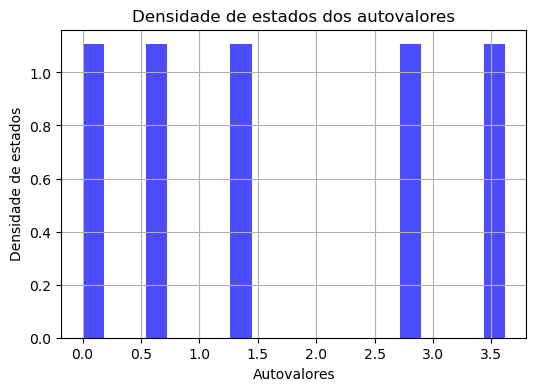

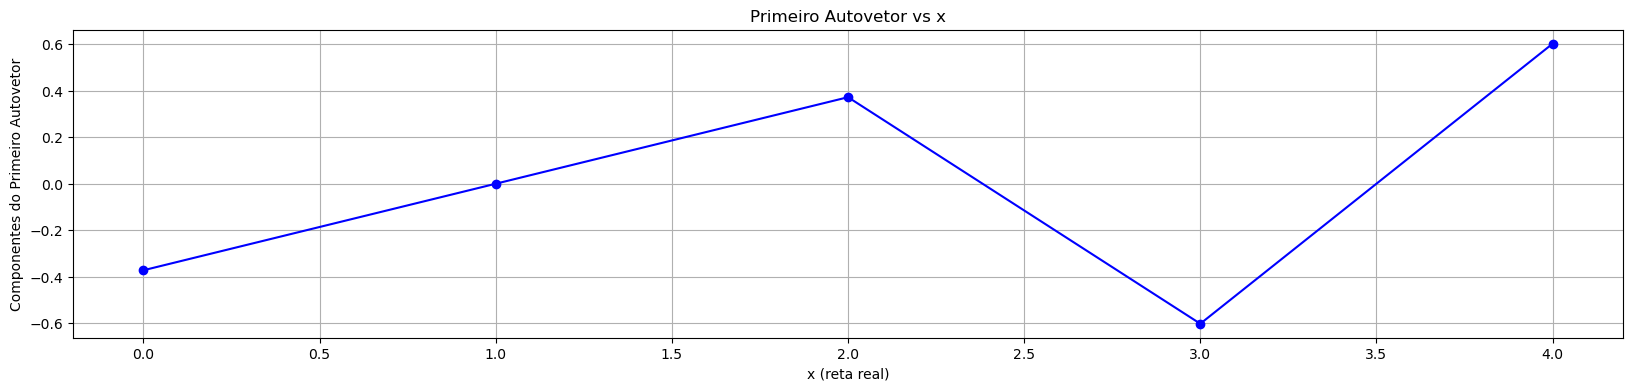

In [30]:
import matplotlib.pyplot as plt

# Calcula os autovalores da matriz
autovalores, autovetores  = np.linalg.eig(matriz)
avl = list(autovalores)
avl.sort()

avt = []
print("Autovalores:", avl[0:(n//2)])

print("Autovetores:")
for q in range(0,n):
    avt.append([])
    for p in range(0,n):
        avt[q].append(autovetores[q][p])
        avt[q].sort()

avt.sort()
for q in avt:
    print(q)


# Plota a densidade de estados (histograma dos autovalores)
plt.figure(figsize=(6,4))
plt.hist(avl, bins=20, density=True, alpha=0.7, color='blue')
plt.xlabel('Autovalores')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados dos autovalores')
plt.grid(True)
plt.show()



# Plota o primeiro autovetor em função de uma reta real x
x = np.arange(n)
plt.figure(figsize=(20,4))
plt.plot(x, autovetores[:,0], marker='o', linestyle='-', color='blue')
plt.xlabel('x (reta real)')
plt.ylabel('Componentes do Primeiro Autovetor')
plt.title('Primeiro Autovetor vs x')
plt.grid(True)
plt.show()